# Covid-19 Vaccine Allocations and Case Counts Analysis
----

Written in the Python 3.7.9 Environment

By Tarak Patel, Nicole Lund and Anne Niemiec.

Common Jupyter cells have been notated for ease of merging after individuals their analysis.

Individual working files will be merged using https://pypi.org/project/nbmerge/

In [2]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load Dependencies

# Data Organization & Collection
import pandas as pd
import requests
import json
from census import Census

# Data Visualization & Analysis
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import gmaps

# General Navigation
import time
import os
import sys

In [3]:
# Define users api key file folder location
api_key_path = r"C:\Users\nlund\Documents\GitHub\untracked_files"

In [4]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Add API key file to system path
sys.path.append(api_key_path)

# Import Census API Key
from untracked_api_keys import census_key
c = Census(census_key, year=2019)

# Import Google API key
from untracked_api_keys import g_key

ModuleNotFoundError: No module named 'untracked_api_keys'

In [5]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Case and Death Counts by state and time
    # This data combines:
        # United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'
        # state_code.csv

c_d_withstate_df_path = r"..\data_manipulation\clean_data\c_d_withstate_df.csv"
cases_deaths_df = pd.read_csv(c_d_withstate_df_path)
cases_deaths_df.head()

,state_name,state_code,date,day_num,total_cases,confirmed_cases,probable_cases,new_cases,pnew_cases,total_deaths,confirmed_deaths,probable_deaths,new_deaths,pnew_deaths,consent_cases,consent_deaths,created_at
0,Alaska,AK,12/14/2020,0,40160,0.0,0.0,422,0.0,175,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
1,Alabama,AL,12/14/2020,0,297895,244762.0,53133.0,2264,332.0,4102,3624.0,478.0,0,0.0,Agree,Agree,12/15/2020 14:39
2,Arkansas,AR,12/14/2020,0,187057,0.0,0.0,1355,122.0,2990,0.0,0.0,45,22.0,Not agree,Not agree,12/15/2020 14:39
3,American Samoa,AS,12/14/2020,0,3,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
4,Arizona,AZ,12/14/2020,0,420248,404294.0,15954.0,11806,503.0,7358,6782.0,576.0,1,-2.0,Agree,Agree,12/15/2020 14:39


In [6]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Vaccination Allocation Data by state and time
    # This data combines:
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv

Combined_Vaccine_df_path = r"..\data_manipulation\clean_data\Combined_Vaccine_df.csv"
vaccine_allocation_df = pd.read_csv(Combined_Vaccine_df_path)
vaccine_allocation_df.head()

,state_name,state_code,date,day_num,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1
0,Connecticut,CT,04/19/2021,126,54990,54990,40400.0,40400.0,0.0
1,Maine,ME,04/19/2021,126,21060,21060,15400.0,15400.0,0.0
2,Massachusetts,MA,04/19/2021,126,105300,105300,77700.0,77700.0,0.0
3,New Hampshire,NH,04/19/2021,126,21060,21060,15500.0,15500.0,0.0
4,Rhode Island,RI,04/19/2021,126,16380,16380,12100.0,12100.0,0.0


In [29]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for State Population from Census reports
    # This data collects census API request data by state:
        # Population.csv

Population_path = r"..\data_manipulation\clean_data\Population.csv"
census_df = pd.read_csv(Population_path)
census_df.head()

,state_name,state_code,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate
0,Alabama,AL,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946
1,Alaska,AK,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114
2,Arizona,AZ,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676
3,Arkansas,AR,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,70481.0,2.349860
4,California,CA,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,1199233.0,3.052765


# Group 1 Analysis

## Line Plot showing National Summarized Vaccine Allocations by Date 
x-axis = Date (The data is reported weekly. To simplify the labels, convert the dates to a week number and then label by month.)

y-axis =

Line 1 - Pfizer + Moderna 1st dose allocation  
Line 2 - Pfizer + Moderna 2nd dose allocation  
Line 3 - J&J allocations  
Note: y-axis data is a summation for all states  
Legend labels = Pfizer + Moderna 1st dose, Pfizer + Moderna 2nd dose, J&J Single dose

In [8]:
vaccine_allocation_df['Month'] = pd.DatetimeIndex(vaccine_allocation_df['date']).month.astype(str)
vaccine_allocation_df['Year'] = pd.DatetimeIndex(vaccine_allocation_df['date']).year.astype(str)
vaccine_allocation_df['yr_mo'] = vaccine_allocation_df['Year'] + '-' + vaccine_allocation_df['Month']
vaccine_By_day = vaccine_allocation_df.groupby(['day_num', 'date', 'yr_mo']).sum().reset_index()
vaccine_By_day
# vaccine_allocation_df

,day_num,date,yr_mo,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1
0,0,12/14/2020,2020-12,2980575,2943525,0.0,0.0,0.0
1,7,12/21/2020,2020-12,2071875,2071875,5990000.0,5948600.0,0.0
2,14,12/28/2020,2020-12,2643225,2643225,2047300.0,2047300.0,0.0
3,21,01/04/2021,2021-1,2131350,2092350,2104400.0,2064400.0,0.0
4,28,01/11/2021,2021-1,2084550,2084550,2047200.0,2047200.0,0.0
5,35,01/18/2021,2021-1,2149875,2149875,2150000.0,2150000.0,0.0
6,42,01/25/2021,2021-1,2149875,2149875,2150300.0,2150300.0,0.0
7,49,02/01/2021,2021-2,2204475,2165475,2915180.0,2881400.0,0.0
8,56,02/08/2021,2021-2,2149875,2149875,3430000.0,3430000.0,0.0
9,63,02/15/2021,2021-2,2149875,2149875,3350000.0,3350000.0,0.0


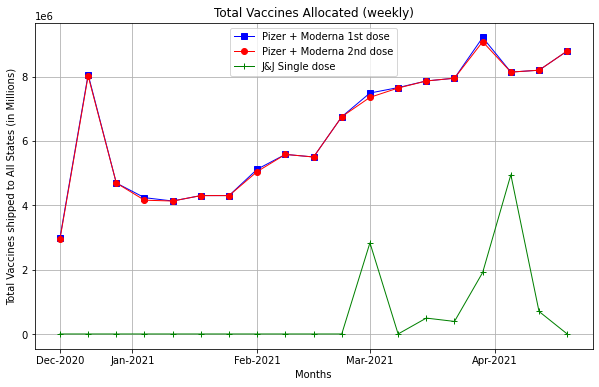

In [9]:
## Adding Dose 1 PFE and MRNA And Adding Dose2 PFE and MRNA
vaccine_By_day['Dose_1'] = vaccine_By_day['pfe_dose_1'] + vaccine_By_day['mrna_dose_1']
vaccine_By_day['Dose_2'] = vaccine_By_day['pfe_dose_2'] + vaccine_By_day['mrna_dose_2']

## Plot Figure
plt.figure(figsize=(10,6))
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['Dose_1'], marker='s',color='b', linewidth=1, label='Pizer + Moderna 1st dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['Dose_2'], marker='o', color='red', linewidth=1, label='Pizer + Moderna 2nd dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['jnj_dose_1'], marker='+', color='green', linewidth=1, label='J&J Single dose')

## Labels and Ticks
plt.xlabel('Months')
plt.ylabel('Total Vaccines shipped to All States (in Millions)')
plt.title('Total Vaccines Allocated (weekly)')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')
plt.legend(loc='upper center')
plt.grid()
plt.show()

# vaccine_By_day.to_csv('vacation.csv')


## Line Plot showing National Vaccine Allocations by Date
x-axis = Date (The data is reported weekly. To simplify the labels, convert the dates to a week number and then label by month.)

y-axis =

Line 1 - Pfizer 1st dose allocation  
Line 2 - Moderna 1st dose allocations  
Line 3 - Pfizer 2nd dose allocations  
Line 4 - Moderna 2nd dose allocations  
Line 5 - J&J allocations  
Note: y-axis data is a summation for all states  
Legend labels = Pfizer 1st dose, Moderna 1st dose, Pfizer 2nd dose, Moderna 2nd dose, J&J Single dose

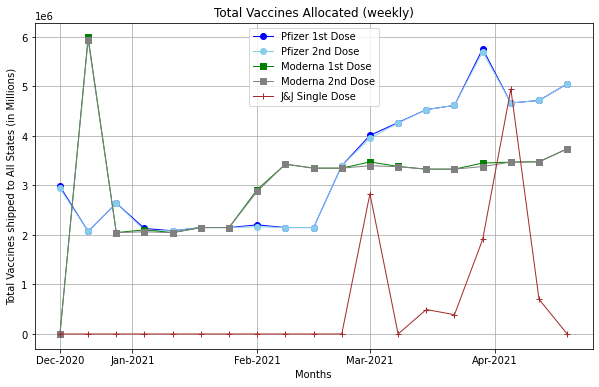

In [10]:
## Plot Figure
plt.figure(figsize=(10,6))
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['pfe_dose_1'], marker='o',color='b', linewidth=1, label='Pfizer 1st Dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['pfe_dose_2'], marker='o', color='skyblue', linewidth=1, label='Pfizer 2nd Dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['mrna_dose_1'], marker='s', color='green', linewidth=1, label='Moderna 1st Dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['mrna_dose_2'], marker='s', color='grey', linewidth=1, label='Moderna 2nd Dose')
plt.plot(vaccine_By_day['day_num'], vaccine_By_day['jnj_dose_1'], marker='+', color='brown', linewidth=1, label='J&J Single Dose')

## Labels and Ticks
plt.xlabel('Months')
plt.ylabel('Total Vaccines shipped to All States (in Millions)')
plt.title('Total Vaccines Allocated (weekly)')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')
plt.legend(loc='upper center')
plt.grid()
plt.show()

## Line Plot showing Individual State (Arizona) Vaccine Allocations by Date
x-axis = Date (The data is reported weekly. To simplify the labels, convert the dates to a week number and then label by month.)

y-axis =

Line 1 - Pfizer 1st dose allocation  
Line 2 - Moderna 1st dose allocations  
Line 3 - Pfizer 2nd dose allocations  
Line 4 - Moderna 2nd dose allocations  
Line 5 - J&J allocations  
Legend labels = Pfizer 1st dose, Moderna 1st dose, Pfizer 2nd dose, Moderna 2nd dose, J&J Single dose

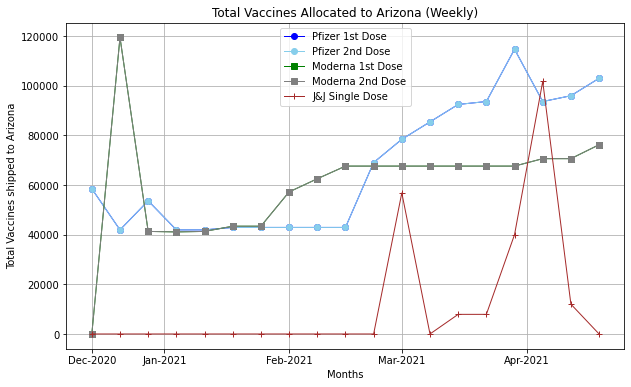

In [11]:
state_df = vaccine_allocation_df[vaccine_allocation_df['state_name'] == 'Arizona'].sort_values(by='day_num').reset_index()
state_df

## Plot Figure
plt.figure(figsize=(10,6))
plt.plot(state_df['day_num'], state_df['pfe_dose_1'], marker='o',color='b', linewidth=1, label='Pfizer 1st Dose')
plt.plot(state_df['day_num'], state_df['pfe_dose_2'], marker='o', color='skyblue', linewidth=1, label='Pfizer 2nd Dose')
plt.plot(state_df['day_num'], state_df['mrna_dose_1'], marker='s', color='green', linewidth=1, label='Moderna 1st Dose')
plt.plot(state_df['day_num'], state_df['mrna_dose_2'], marker='s', color='grey', linewidth=1, label='Moderna 2nd Dose')
plt.plot(state_df['day_num'], state_df['jnj_dose_1'], marker='+', color='brown', linewidth=1, label='J&J Single Dose')

## Labels and Ticks
plt.xlabel('Months')
plt.ylabel('Total Vaccines shipped to Arizona')
plt.title('Total Vaccines Allocated to Arizona (Weekly)')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')
plt.legend(loc='upper center')
plt.grid()
plt.show()

## Bonus Line Plot showing Individual State (User Choice) Vaccine Allocations by Date
x-axis = Date (The data is reported weekly. To simplify the labels, convert the dates to a week number and then label by month.)

y-axis =

Line 1 - Pfizer 1st dose allocation  
Line 2 - Moderna 1st dose allocations  
Line 3 - Pfizer 2nd dose allocations  
Line 4 - Moderna 2nd dose allocations  
Line 5 - J&J allocations  
Legend labels = Pfizer 1st dose, Moderna 1st dose, Pfizer 2nd dose, Moderna 2nd dose, J&J Single dose

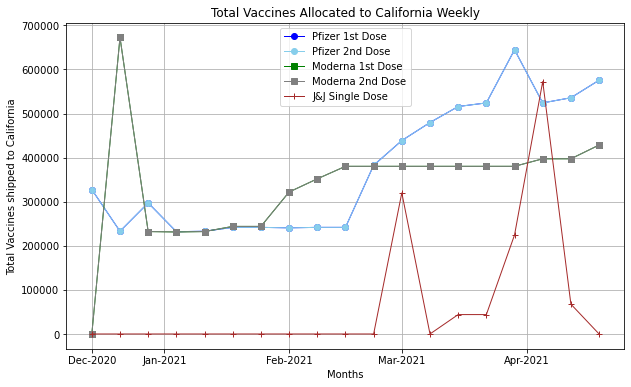

In [12]:
userchoice = input('Select State Code or State name')

state_df = vaccine_allocation_df[(vaccine_allocation_df['state_code'] == userchoice) | (vaccine_allocation_df['state_name'] == userchoice)].sort_values(by='day_num').reset_index()
state_df

## Plot Figure
plt.figure(figsize=(10,6))
plt.plot(state_df['day_num'], state_df['pfe_dose_1'], marker='o',color='b', linewidth=1, label='Pfizer 1st Dose')
plt.plot(state_df['day_num'], state_df['pfe_dose_2'], marker='o', color='skyblue', linewidth=1, label='Pfizer 2nd Dose')
plt.plot(state_df['day_num'], state_df['mrna_dose_1'], marker='s', color='green', linewidth=1, label='Moderna 1st Dose')
plt.plot(state_df['day_num'], state_df['mrna_dose_2'], marker='s', color='grey', linewidth=1, label='Moderna 2nd Dose')
plt.plot(state_df['day_num'], state_df['jnj_dose_1'], marker='+', color='brown', linewidth=1, label='J&J Single Dose')

## Labels and Ticks
plt.xlabel('Months')
plt.ylabel(f'Total Vaccines shipped to {userchoice}')
plt.title(f'Total Vaccines Allocated to {userchoice} Weekly')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')
plt.legend(loc='upper center')
plt.grid()
plt.show()

In [13]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Daily Vaccination Administered Data by state
     
Vaccine_admin_path = r"..\data_manipulation\clean_data\Vaccines_Administered_df.csv"
vaccine_admin_df = pd.read_csv(Vaccine_admin_path)
vaccine_admin_df

,state_name,state_code,date,day_num,daily_vaccinations
0,Alabama,AL,2021-01-13,30,5906
1,Alabama,AL,2021-01-14,31,7083
2,Alabama,AL,2021-01-15,32,7478
3,Alabama,AL,2021-01-16,33,7498
4,Alabama,AL,2021-01-17,34,7509
...,...,...,...,...,...
6518,Wyoming,WY,2021-04-18,125,1857
6519,Wyoming,WY,2021-04-19,126,1884
6520,Wyoming,WY,2021-04-20,127,2657
6521,Wyoming,WY,2021-04-21,128,2260


In [43]:
# merge Vaccine Administerd with Population.vaccine_admin_df
merge_census_vacadm = pd.merge(vaccine_admin_df, census_df, left_on='state_code', right_on='state_code', how='inner')
merge_census_vacadm
## Merger Previous DF with Vaccine Allocated DF
merge_df = pd.merge(merge_census_vacadm, vaccine_allocation_df, left_on=['state_code','day_num'], right_on=['state_code','day_num'], how='inner')
merge_df

# merge_df = pd.merge(vaccine_admin_df, vaccine_allocation_df, left_on=['state_code','day_num'], right_on=['state_code','day_num'], how='inner')
# merge_df


# # merge_df.to_csv('merge_df.csv')

,state_name_x,state_code,date_x,day_num,daily_vaccinations,state_name_y,population,median_age,household_income,per_capita_income,...,state_name,date_y,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1,Month,Year,yr_mo
0,Alabama,AL,2021-01-18,35,7517,Alabama,4876250.0,39.0,50536.0,27928.0,...,Alabama,01/18/2021,30225,30225,30600.0,30600.0,0.0,1,2021,2021-1
1,Alabama,AL,2021-01-25,42,18196,Alabama,4876250.0,39.0,50536.0,27928.0,...,Alabama,01/25/2021,30225,30225,30600.0,30600.0,0.0,1,2021,2021-1
2,Alabama,AL,2021-02-01,49,15381,Alabama,4876250.0,39.0,50536.0,27928.0,...,Alabama,02/01/2021,30225,30225,40400.0,40400.0,0.0,2,2021,2021-2
3,Alabama,AL,2021-02-08,56,15622,Alabama,4876250.0,39.0,50536.0,27928.0,...,Alabama,02/08/2021,30225,30225,44100.0,44100.0,0.0,2,2021,2021-2
4,Alabama,AL,2021-02-15,63,22405,Alabama,4876250.0,39.0,50536.0,27928.0,...,Alabama,02/15/2021,30225,30225,47700.0,47700.0,0.0,2,2021,2021-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,Wyoming,WY,2021-03-22,98,1279,Wyoming,581024.0,37.7,64049.0,33366.0,...,Wyoming,03/22/2021,8190,8190,5700.0,5700.0,700.0,3,2021,2021-3
766,Wyoming,WY,2021-03-29,105,5785,Wyoming,581024.0,37.7,64049.0,33366.0,...,Wyoming,03/29/2021,10530,10530,5700.0,5700.0,3400.0,3,2021,2021-3
767,Wyoming,WY,2021-04-05,112,3574,Wyoming,581024.0,37.7,64049.0,33366.0,...,Wyoming,04/05/2021,8190,8190,5900.0,5900.0,8500.0,4,2021,2021-4
768,Wyoming,WY,2021-04-12,119,3400,Wyoming,581024.0,37.7,64049.0,33366.0,...,Wyoming,04/12/2021,8190,8190,5900.0,5900.0,1000.0,4,2021,2021-4


In [59]:
## The reason I used this Merged df is to keep the number of record consistant across the different columns. 
population_df = census_df[['state_code', 'population']]
# population1 = population[['state_code', 'population']].set_index(['state_code'])
population_df


# #Sum the columns. Rember to use population1 column for pupulateion because you don't want to sum bhe Population column 
merge_groupby_df = merge_df.groupby(['state_code']).sum().reset_index()
merge_groupby_df['Total Allocated'] = merge_groupby_df['pfe_dose_1'] + merge_groupby_df['pfe_dose_2'] + merge_groupby_df['mrna_dose_1'] + merge_groupby_df['mrna_dose_2'] + merge_groupby_df['jnj_dose_1']
# merge_groupby_df['Population1'] = merge_groupby_df[merge_groupby_df['day_num'] == 17]
# merge_groupby_df.to_csv('merge.csv')
final_merge_gb_pop = pd.merge(merge_groupby_df, population_df, left_on='state_code', right_on='state_code', how='inner')
final_merge_gb_pop.head()


,state_code,day_num,daily_vaccinations,population_x,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1,Total Allocated,population_y
0,AK,1127,69436,10318952.0,480.2,1086960.0,515018.0,1077062.0,146.127901,375312.0,50.919590,172380,160680,134100.0,134100.0,35500.0,636760.0,737068.0
1,AL,1127,318134,68267500.0,546.0,707504.0,390992.0,11143846.0,228.533115,1849330.0,37.925250,734955,734955,632900.0,632900.0,159900.0,2895610.0,4876250.0
2,AR,1127,227628,41991180.0,533.4,666358.0,372078.0,6947640.0,231.636644,986734.0,32.898042,447135,447135,383800.0,383800.0,97100.0,1758970.0,2999370.0
3,AZ,1127,632402,98704186.0,527.8,825230.0,429716.0,14612696.0,207.263493,2742670.0,38.901471,1040520,1040520,897100.0,897100.0,226300.0,4101540.0,7050299.0
4,CA,1127,3672888,549968958.0,511.0,1053290.0,517370.0,72096388.0,183.528437,16789262.0,42.738715,5829525,5829525,5047400.0,5047400.0,1273000.0,23026850.0,39283497.0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x432 with 0 Axes>

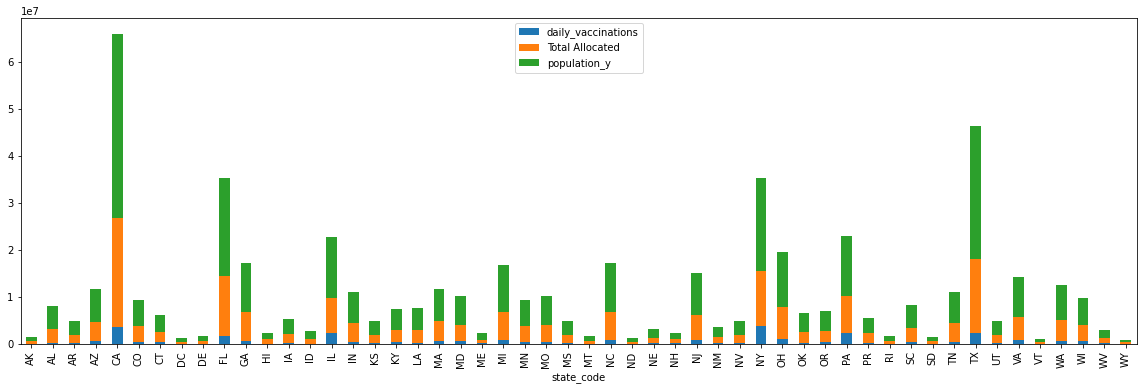

In [71]:
## Plot Line Chart

## Plot Figure
plt.figure(figsize=(20,6))
df_for_chart = final_merge_gb_pop[['state_code', 'daily_vaccinations', 'Total Allocated', 'population_y']]
df_for_chart1 = df_for_chart.set_index('state_code')
df_for_chart1.plot(kind='bar', figsize=(20,6), stacked=True)

# plt.plot(df_for_chart['state_code'], df_for_chart['daily_vaccinations'], marker='o',color='skyblue', linewidth=1, label='Dose Administered')
# plt.plot(df_for_chart['state_code'], df_for_chart['Total Allocated'], marker='o',color='b', linewidth=1, label='Dose Allocation')
# plt.scatter(df_for_chart['state_code'], df_for_chart['population_y'], marker='o',color='g', linewidth=1, label='population')

# plt.plot(state_df['day_num'], state_df['pfe_dose_2'], marker='o', color='skyblue', linewidth=1, label='Pfizer 2nd Dose')
# plt.plot(state_df['day_num'], state_df['mrna_dose_1'], marker='s', color='green', linewidth=1, label='Moderna 1st Dose')
# plt.plot(state_df['day_num'], state_df['mrna_dose_2'], marker='s', color='grey', linewidth=1, label='Moderna 2nd Dose')
# plt.plot(state_df['day_num'], state_df['jnj_dose_1'], marker='+', color='brown', linewidth=1, label='J&J Single Dose')

# ## Labels and Ticks
# plt.xlabel('Months')
# plt.ylabel('Total Vaccines shipped to Arizona')
# plt.title('Total Vaccines Allocated to Arizona (Weekly)')
# plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')
plt.legend(loc='upper center')
# plt.grid()
plt.show